In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url = 'https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip'

!wget "https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip" -O dataset.zip


--2025-02-17 03:22:41--  https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7991968 (7.6M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   7.62M  --.-KB/s    in 0.07s   

2025-02-17 03:22:41 (105 MB/s) - ‘dataset.zip’ saved [7991968/7991968]



In [ ]:
import zipfile
import os

zip_path = "dataset.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['encounters.csv',
 'supplies.csv',
 'providers.csv',
 'devices.csv',
 'procedures.csv',
 'allergies.csv',
 'imaging_studies.csv',
 'claims_transactions.csv',
 'payer_transitions.csv',
 'patients.csv',
 'organizations.csv',
 'conditions.csv',
 'claims.csv',
 'careplans.csv',
 'observations.csv',
 'immunizations.csv',
 'payers.csv',
 'medications.csv']

In [ ]:
csv_files = [file for file in os.listdir(extract_path) if file.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

for filename, df in dataframes.items():
    print(f" FILE {filename} - SHAPE: {df.shape}")
    display(df.head(3))  # Show first 3 rows


 FILE encounters.csv - SHAPE: (7049, 15)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,294d0dab-907e-8fce-7a47-0c0d322a5734,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1567.00,87.2,NaN,NaN
1,2ccec874-cbaa-e280-7abb-f2bc2b603961,2013-04-07T09:04:48Z,2013-04-07T09:55:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.0,NaN,NaN
2,953c5138-ce17-4084-3432-1ac23f184528,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,db106514-f254-3402-b6a4-6d210c78c7e2,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,emergency,50849002,Emergency room admission (procedure),146.18,1008.98,0.0,125605004.0,Fracture of bone (disorder)


 FILE supplies.csv - SHAPE: (2688, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2016-04-24,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,277183007,Dental equipment (physical object),1
1,1996-10-22,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337388004,Blood glucose testing strips (physical object),50
2,1999-10-26,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,dd83e406-eae2-49dc-734e-06d34594f3df,337388004,Blood glucose testing strips (physical object),50


 FILE providers.csv - SHAPE: (272, 13)


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,ENCOUNTERS,PROCEDURES
0,22d80c8d-fb8f-322d-9753-22002b043474,74ab949d-17ac-3309-83a0-13b4405c66aa,Ted955 Reilly981,M,GENERAL PRACTICE,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,66,0
1,76781d9f-6cd0-30f2-81b3-359fad974235,faffaf6a-ee1a-3673-b0b0-421a9c249244,Gustavo235 Armstrong51,M,GENERAL PRACTICE,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,34,0
2,5fca6a38-55af-324f-835b-0eb5837afc1c,17a4bae5-8b64-34d7-8144-b428be027bd0,Isabela97 Solorio55,F,GENERAL PRACTICE,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5,0


 FILE devices.csv - SHAPE: (676, 7)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,228869008,Manual wheelchair (physical object),(01)74035126130039(11)150907(17)400921(10)7561...
1,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,705417005,Wheelchair accessory (physical object),(01)74178207044942(11)150907(17)400921(10)4565...
2,1996-10-22T19:07:21Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337414009,Blood glucose meter (physical object),(01)32229498379273(11)961001(17)211016(10)2817...


 FILE procedures.csv - SHAPE: (17784, 10)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T09:04:48Z,2015-09-28T09:34:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,713021002,Plain X-ray of pelvis (procedure),431.4,NaN,NaN
1,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,305428000,Admission to orthopedic department (procedure),431.4,359817006.0,Closed fracture of hip (disorder)
2,2016-04-10T09:04:48Z,2016-04-10T09:19:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,http://snomed.info/sct,430193006,Medication reconciliation (procedure),852.4,NaN,NaN


 FILE allergies.csv - SHAPE: (92, 15)


,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,84489001,SNOMED-CT,Mold (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,264287008,SNOMED-CT,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,247472004.0,Wheal (finding),MILD


 FILE imaging_studies.csv - SHAPE: (407, 13)


,Id,DATE,PATIENT,ENCOUNTER,SERIES_UID,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,INSTANCE_UID,SOP_CODE,SOP_DESCRIPTION,PROCEDURE_CODE
0,75c55607-6b95-b44b-f5a1-d3bf5432c23a,2015-09-28T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,1.2.840.99999999.1.89211462.1443431088265,12921003,Structure of pelvis (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.43566029.1443431088265,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,713021002
1,5e3b667c-2d48-0401-0434-34fd3e7cc267,2016-04-24T10:56:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,1.2.840.99999999.1.95156023.1461495409265,700016008,Structure of region of internal part of mouth ...,DX,Digital Radiography,1.2.840.99999999.1.1.67878918.1461495409265,1.2.840.10008.5.1.4.1.1.1.3,Digital Intra-Oral X-Ray Image Storage - For P...,241046008
2,ddaaa2df-5e1c-0ccf-cd2d-3215281e14ce,2015-09-14T18:02:09Z,7179458e-d6e3-c723-2530-d4acfe1c2668,ed8fc369-fd6a-5249-187c-690e5c4524ed,1.2.840.99999999.1.99948491.1442253729798,91609006,Bone structure of mandible (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.83142373.1442253729798,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,19589009


 FILE claims_transactions.csv - SHAPE: (111602, 33)


,ID,CLAIMID,CHARGEID,PATIENTID,TYPE,AMOUNT,METHOD,FROMDATE,TODATE,PLACEOFSERVICE,...,PAYMENTS,ADJUSTMENTS,TRANSFERS,OUTSTANDING,APPOINTMENTID,LINENOTE,PATIENTINSURANCEID,FEESCHEDULEID,PROVIDERID,SUPERVISINGPROVIDERID
0,ea4e815f-ce9f-2abc-6dc8-b65d49d90abf,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,0,30a6452c-4297-a1ac-977a-6a23237c7b46,CHARGE,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,NaN,0.0,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
1,d49d02bf-9d41-5579-db91-6cba93b5157e,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,1,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFEROUT,NaN,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
2,a93a057f-3a85-aaf3-b722-d975276d2afd,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,2,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFERIN,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024


 FILE payer_transitions.csv - SHAPE: (1145, 8)


,PATIENT,MEMBERID,START_DATE,END_DATE,PAYER,SECONDARY_PAYER,PLAN_OWNERSHIP,OWNER_NAME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,8c03da34-561e-4f25-6fe1-404bcbbd2d37,2013-02-10T09:04:48Z,2014-02-09T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
1,30a6452c-4297-a1ac-977a-6a23237c7b46,fcd3c5f5-229b-f6da-f9b1-57e9ccdd4227,2014-02-09T09:04:48Z,2015-02-08T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
2,30a6452c-4297-a1ac-977a-6a23237c7b46,e7478da0-add2-e9ab-5fa7-5404bb14a93d,2015-02-08T09:04:48Z,2016-02-07T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533


 FILE patients.csv - SHAPE: (106, 28)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,1994-02-06,NaN,999-52-8591,S99996852,X47758697X,Mr.,Joshua658,Alvin56,Kunde533,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.211142,-71.045802,56904.96,18019.99,100511
1,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,1968-08-06,2009-12-11,999-75-3953,S99993577,X28173268X,Mr.,Bennie663,NaN,Ebert178,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.255420,-70.971016,124024.12,1075.06,49737
2,7179458e-d6e3-c723-2530-d4acfe1c2668,2008-12-21,NaN,999-70-1925,NaN,NaN,NaN,Hunter736,Mckinley734,Gerlach374,...,Mattapoisett,Massachusetts,Plymouth County,NaN,0,41.648292,-70.850619,45645.06,6154.94,133816


 FILE organizations.csv - SHAPE: (272, 11)


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,74ab949d-17ac-3309-83a0-13b4405c66aa,Fitchburg Outpatient Clinic,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,978-342-9781 Or 978-342-9781,0.0,66
1,faffaf6a-ee1a-3673-b0b0-421a9c249244,ACTIVATED BY WELLNESS LLC,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,6178719807,0.0,34
2,17a4bae5-8b64-34d7-8144-b428be027bd0,NURSE ON CALL,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5088451232,0.0,5


 FILE conditions.csv - SHAPE: (3876, 7)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,105531004,Housing unsatisfactory (finding)
1,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,224299000,Received higher education (finding)
2,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,266934004,Transport problem (finding)


 FILE claims.csv - SHAPE: (12654, 31)


,Id,PATIENTID,PROVIDERID,PRIMARYPATIENTINSURANCEID,SECONDARYPATIENTINSURANCEID,DEPARTMENTID,PATIENTDEPARTMENTID,DIAGNOSIS1,DIAGNOSIS2,DIAGNOSIS3,...,STATUS2,STATUSP,OUTSTANDING1,OUTSTANDING2,OUTSTANDINGP,LASTBILLEDDATE1,LASTBILLEDDATE2,LASTBILLEDDATEP,HEALTHCARECLAIMTYPEID1,HEALTHCARECLAIMTYPEID2
0,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,105531004,224299000.0,266934004.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,1,1
1,f1eb9d4d-4370-3739-1321-80287b11d1e9,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,314529007,160903007.0,713458007.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,1,1
2,8052e96e-df67-3cc4-21cf-cfc9fc909a4a,30a6452c-4297-a1ac-977a-6a23237c7b46,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,NaN,4,4,125605004,125605004.0,359817006.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2,2


 FILE careplans.csv - SHAPE: (329, 9)


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,47441dae-e581-6d99-e5fc-b7fbd9cde7fe,2015-09-28,2015-10-31,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,385691007,Fracture care (regime/therapy),359817006.0,Closed fracture of hip (disorder)
1,131c18a3-d324-663f-2f4a-d3ff0f6c26d6,1996-10-22,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
2,21ffb15e-179c-d330-70f0-0ebc59b1cdb9,2020-10-30,2020-11-20,30a6452c-4297-a1ac-977a-6a23237c7b46,794baa15-fe5e-c061-e188-ad59022aeea5,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle (disorder)


 FILE observations.csv - SHAPE: (86360, 9)


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,8302-2,Body Height,176.1,cm,numeric
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,29463-7,Body Weight,86.4,kg,numeric


 FILE immunizations.csv - SHAPE: (1619, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,140,Influenza seasonal injectable preservative ...,136.0
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,113,Td (adult) 5 Lf tetanus toxoid preservative ...,136.0
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,43,Hep B adult,136.0


 FILE payers.csv - SHAPE: (10, 22)


,Id,NAME,OWNERSHIP,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,a735bf55-83e9-331a-899d-a82a60b9f60c,Medicare,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,7816873.41,388769.54,...,0,3742,0,9155,0,546,0,30,0.692503,5532
1,df166300-5a78-3502-a46a-832842197811,Medicaid,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,8673985.13,192216.37,...,0,891,0,4990,0,886,0,44,0.939526,7092
2,d18ef2e6-ef40-324c-be54-34a5ee865625,Dual Eligible,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,581647.09,7344.74,...,0,67,0,527,0,72,0,5,0.513418,864


 FILE medications.csv - SHAPE: (5605, 13)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T11:02:48Z,2015-10-15T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,857005,Acetaminophen 325 MG / HYDROcodone Bitartrate ...,2.51,0.0,1,2.51,NaN,NaN
1,2015-09-28T11:02:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,310965,Ibuprofen 200 MG Oral Tablet,365.90,0.0,1,365.90,NaN,NaN
2,2005-11-08T20:24:07Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,e03e23c9-4df1-3eb6-a62d-f70f02301496,d1cea2e5-1735-089f-c72f-22ad16976663,310325,ferrous sulfate 325 MG Oral Tablet,0.15,0.0,50,7.50,NaN,NaN


# Data PreProcessing

## Joining Tables

In [ ]:
# loading the CSVs
patients = dataframes['patients.csv']
encounters = dataframes['encounters.csv']
conditions = dataframes['conditions.csv']
procedures = dataframes['procedures.csv']
medications = dataframes['medications.csv']
claims = dataframes['claims.csv']
observations = dataframes['observations.csv']

# rename columns to avoid conflicts before merging
patients = patients.rename(columns=lambda x: f"PATIENT_{x}" if x != "Id" else "PATIENT_ID")
encounters = encounters.rename(columns=lambda x: f"ENCOUNTER_{x}" if x != "Id" else "ENCOUNTER_ID")
conditions = conditions.rename(columns=lambda x: f"CONDITION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
procedures = procedures.rename(columns=lambda x: f"PROCEDURE_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
medications = medications.rename(columns=lambda x: f"MEDICATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
claims = claims.rename(columns=lambda x: f"CLAIM_{x}" if x != "PATIENTID" else "PATIENT_ID")
observations = observations.rename(columns=lambda x: f"OBSERVATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")

# merge Encounters with Patients
df = encounters.merge(patients, left_on='ENCOUNTER_PATIENT', right_on='PATIENT_ID', how='left')

# merge Conditions
df = df.merge(conditions, on='ENCOUNTER_ID', how='left')

# merge Procedures
df = df.merge(procedures, on='ENCOUNTER_ID', how='left')

# merge Medications
df = df.merge(medications, on='ENCOUNTER_ID', how='left')

# merge Observations
df = df.merge(observations, on='ENCOUNTER_ID', how='left')

# drop redundant ID cols
df.drop(columns=['PATIENT_ID', 'ENCOUNTER_ID'], errors='ignore', inplace=True)

print("Shape:", df.shape)
df.head()


Shape: (3887768, 76)


,ENCOUNTER_START,ENCOUNTER_STOP,ENCOUNTER_PATIENT,ENCOUNTER_ORGANIZATION,ENCOUNTER_PROVIDER,ENCOUNTER_PAYER,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_CODE,ENCOUNTER_DESCRIPTION,ENCOUNTER_BASE_ENCOUNTER_COST,...,MEDICATION_REASONCODE,MEDICATION_REASONDESCRIPTION,OBSERVATION_DATE,OBSERVATION_PATIENT,OBSERVATION_CATEGORY,OBSERVATION_CODE,OBSERVATION_DESCRIPTION,OBSERVATION_VALUE,OBSERVATION_UNITS,OBSERVATION_TYPE
0,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['ENCOUNTER_START', 'ENCOUNTER_STOP', 'ENCOUNTER_PATIENT',
       'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER',
       'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_CODE', 'ENCOUNTER_DESCRIPTION',
       'ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST',
       'ENCOUNTER_PAYER_COVERAGE', 'ENCOUNTER_REASONCODE',
       'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_BIRTHDATE', 'PATIENT_DEATHDATE',
       'PATIENT_SSN', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT', 'PATIENT_PREFIX',
       'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX',
       'PATIENT_MAIDEN', 'PATIENT_MARITAL', 'PATIENT_RACE',
       'PATIENT_ETHNICITY', 'PATIENT_GENDER', 'PATIENT_BIRTHPLACE',
       'PATIENT_ADDRESS', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
       'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_LAT', 'PATIENT_LON',
       'PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE',
       'PATIENT_INCOME', 'CONDITION_START', 'CONDITION_STOP',
       'CONDITI

## Reducing dataframe

In [ ]:
# initial drop just by looking at the columns

drop_cols = [
    'PATIENT_LAT', 'PATIENT_LON', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT',
    'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX', 'PATIENT_MAIDEN',
    'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER', 'MEDICATION_PAYER',
    'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_DEATHDATE'
]

df.drop(columns=drop_cols, inplace=True)
print("Shape:", df.shape)


Shape: (3887768, 60)


In [ ]:
# which columns have the most null values

null_counts = df.isnull().sum()

null_counts_sorted = null_counts.sort_values(ascending=False)

print(null_counts_sorted)


ENCOUNTER_REASONCODE             2258582
ENCOUNTER_REASONDESCRIPTION      2258582
MEDICATION_REASONCODE            2215176
MEDICATION_REASONDESCRIPTION     2215176
PROCEDURE_REASONCODE             2147635
PROCEDURE_REASONDESCRIPTION      2147635
OBSERVATION_UNITS                 763563
CONDITION_STOP                    421622
CONDITION_CODE                    223854
CONDITION_START                   223854
CONDITION_PATIENT                 223854
CONDITION_SYSTEM                  223854
CONDITION_DESCRIPTION             223854
MEDICATION_STOP                   208918
MEDICATION_CODE                   152358
MEDICATION_START                  152358
MEDICATION_PATIENT                152358
MEDICATION_DESCRIPTION            152358
MEDICATION_PAYER_COVERAGE         152358
MEDICATION_DISPENSES              152358
MEDICATION_TOTALCOST              152358
MEDICATION_BASE_COST              152358
PATIENT_MARITAL                    70899
PROCEDURE_CODE                     21161
PROCEDURE_DESCRI

In [ ]:
# to datetime
date_cols = [
    'ENCOUNTER_START', 'ENCOUNTER_STOP', 'PATIENT_BIRTHDATE',
    'CONDITION_START', 'CONDITION_STOP', 'PROCEDURE_START',
    'PROCEDURE_STOP', 'MEDICATION_START', 'MEDICATION_STOP',
    'OBSERVATION_DATE'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# to category
category_cols = [
    'ENCOUNTER_PATIENT', 'CONDITION_PATIENT', 'PROCEDURE_PATIENT',
    'MEDICATION_PATIENT', 'OBSERVATION_PATIENT', 'ENCOUNTER_ENCOUNTERCLASS',
    'ENCOUNTER_DESCRIPTION', 'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_PREFIX',
    'PATIENT_MARITAL', 'PATIENT_RACE', 'PATIENT_ETHNICITY', 'PATIENT_GENDER',
    'PATIENT_BIRTHPLACE', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
    'CONDITION_SYSTEM', 'CONDITION_DESCRIPTION', 'PROCEDURE_SYSTEM',
    'PROCEDURE_DESCRIPTION', 'PROCEDURE_REASONDESCRIPTION',
    'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'OBSERVATION_CATEGORY', 'OBSERVATION_DESCRIPTION',
    'OBSERVATION_UNITS', 'OBSERVATION_TYPE'
]
for col in category_cols:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 60 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    object             
 13  PATIENT_PREFIX                 category   

In [ ]:
df['OBSERVATION_CODE'] = df['OBSERVATION_CODE'].astype(str).str.replace('-', '')

In [ ]:
df['OBSERVATION_CODE'].unique()

array(['nan', '83022', '725143', '294637', '391565', '84624', '84806',
       '88674', '92791', '66902', '7898', '7187', '45443', '7872', '7856',
       '7864', '210005', '7773', '322073', '326231', '721662', '765016',
       '930263', '930271', '930289', '930388', '930297', '930305',
       '930313', '635862', '764373', '678755', '825893', '567990',
       '930339', '718023', '635128', '548990', '930347', '930354',
       '326249', '560516', '702746', '765040', '557587', '826677',
       '83105', '45484', '23390', '62992', '384834', '497651', '29470',
       '62984', '20693', '205658', '20933', '25718', '182626', '20859',
       '756262', '205708', '694539', '595769', '892042', '756361',
       '27086', '57927', '25148', '58115', '58032', '58040', '58024',
       '57943', '57992', '58214', '139451', '57877', '241240', '82479',
       '57695', '6304', '776062', '82891', '98434', '337568', '579052',
       '921429', '921411', '921312', '921403', '921395', '921387',
       '921304', '921

In [ ]:
df.replace('nan', np.nan, inplace=True)

In [ ]:
df['OBSERVATION_CODE'] = pd.to_numeric(df['OBSERVATION_CODE'], errors='coerce')

In [ ]:
df['OBSERVATION_VALUE'] = pd.to_numeric(df['OBSERVATION_VALUE'], errors='coerce')

In [ ]:
df.drop(columns=['PATIENT_ADDRESS'], inplace=True)

In [ ]:
df['PATIENT_SSN'] = df['PATIENT_SSN'].astype(str).str.replace('-', '')
df['PATIENT_SSN'] = pd.to_numeric(df['PATIENT_SSN'], errors = 'coerce')

In [ ]:
df['PATIENT_SSN'].nunique()

106

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 59 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_PREFIX                 category   

In [ ]:
df.shape

(3887768, 59)

## Nulls

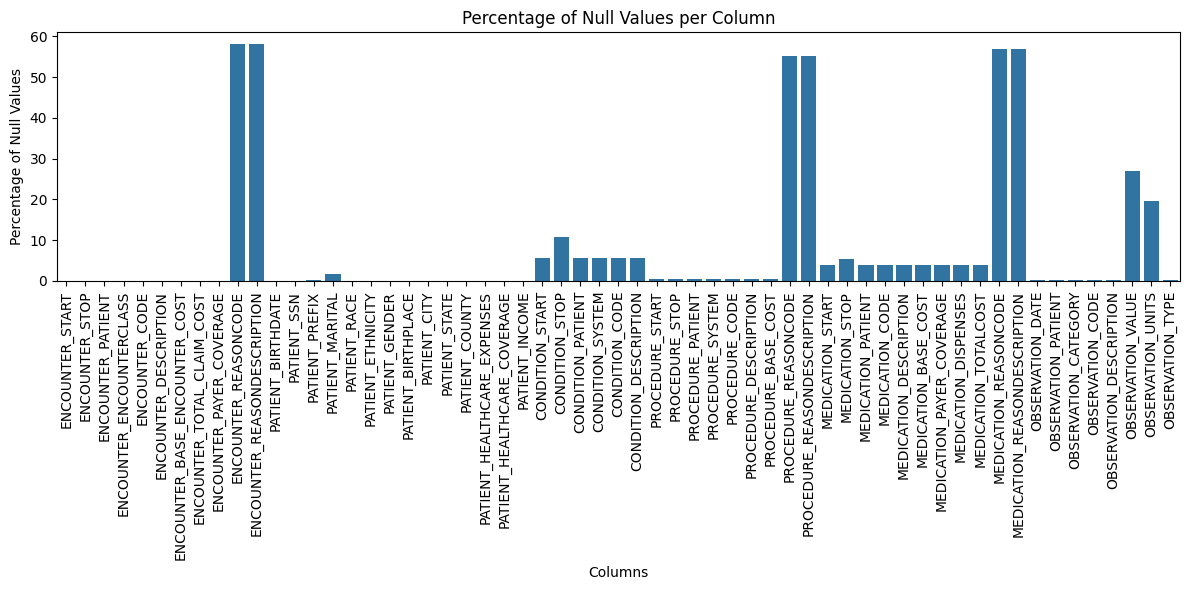

In [ ]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()


In [ ]:
# LOS
df['LENGTH_OF_STAY'] = (df['ENCOUNTER_STOP'] - df['ENCOUNTER_START']).dt.days

# fill missing cost values with median
cost_cols = ['ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST']
df[cost_cols] = df[cost_cols].fillna(df[cost_cols].median())

# fill encounter missing values with mode
df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


<ipython-input-23-da61318f01ae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


In [ ]:
# fill demographic missing values with "UNKNOWN"
demo_cols = ['PATIENT_GENDER', 'PATIENT_RACE', 'PATIENT_ETHNICITY']
for col in demo_cols:
    # add 'UNKNOWN' as a new category
    if 'UNKNOWN' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['UNKNOWN'])
    df[col] = df[col].fillna('UNKNOWN')

In [ ]:
# fill missing condition codes and descriptions with "UNKNOWN"

if 'UNKNOWN' not in df['CONDITION_DESCRIPTION'].cat.categories:
    df['CONDITION_DESCRIPTION'] = df['CONDITION_DESCRIPTION'].cat.add_categories(['UNKNOWN'])
df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
df['CONDITION_CODE'].fillna(-1, inplace=True)

<ipython-input-25-58be6f5a4519>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
<ipython-input-25-58be6f5a4519>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# fill missing medication and procedure details
df['MEDICATION_CODE'].fillna(-1, inplace=True)
df['PROCEDURE_CODE'].fillna(-1, inplace=True)
df['OBSERVATION_VALUE'].fillna(df['OBSERVATION_VALUE'].median(), inplace=True)

if 'UNKNOWN' not in df['OBSERVATION_CATEGORY'].cat.categories:
    df['OBSERVATION_CATEGORY'] = df['OBSERVATION_CATEGORY'].cat.add_categories(['UNKNOWN'])

df['OBSERVATION_CATEGORY'].fillna('UNKNOWN', inplace=True)

<ipython-input-26-b8f8d6213b12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MEDICATION_CODE'].fillna(-1, inplace=True)
<ipython-input-26-b8f8d6213b12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
drop_cols = ['OBSERVATION_TYPE', 'OBSERVATION_UNITS', 'OBSERVATION_CODE',
             'PATIENT_PREFIX', 'PATIENT_BIRTHPLACE']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

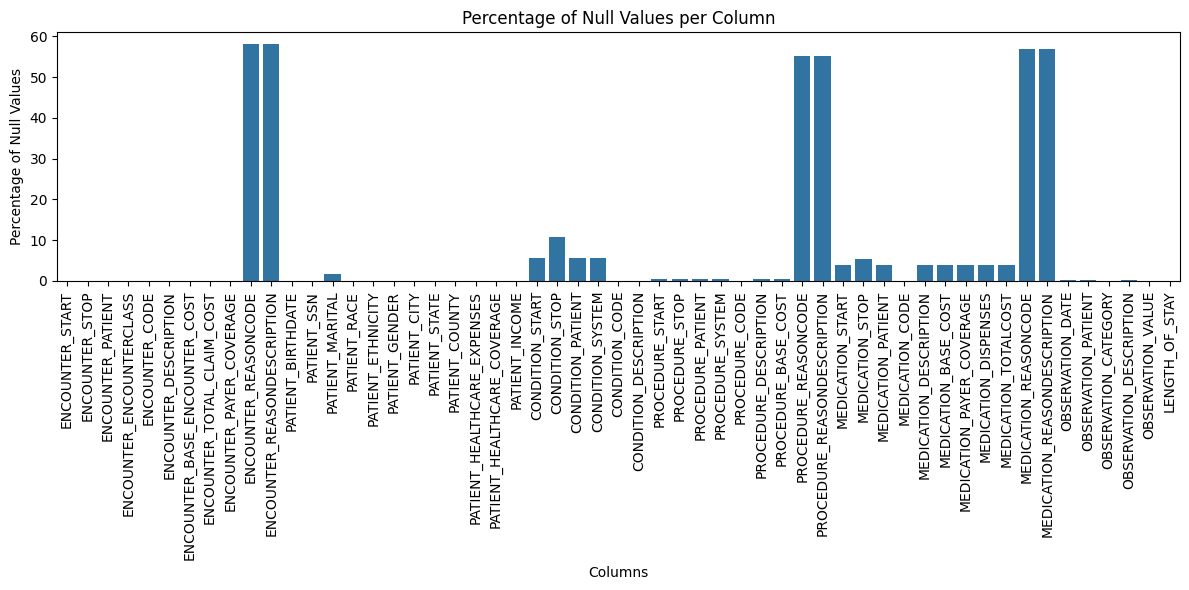

In [ ]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()

# Correlations

In [ ]:
from scipy.stats import pointbiserialr, chi2_contingency


<ipython-input-31-14dccce8a695>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['LENGTH_OF_STAY']):


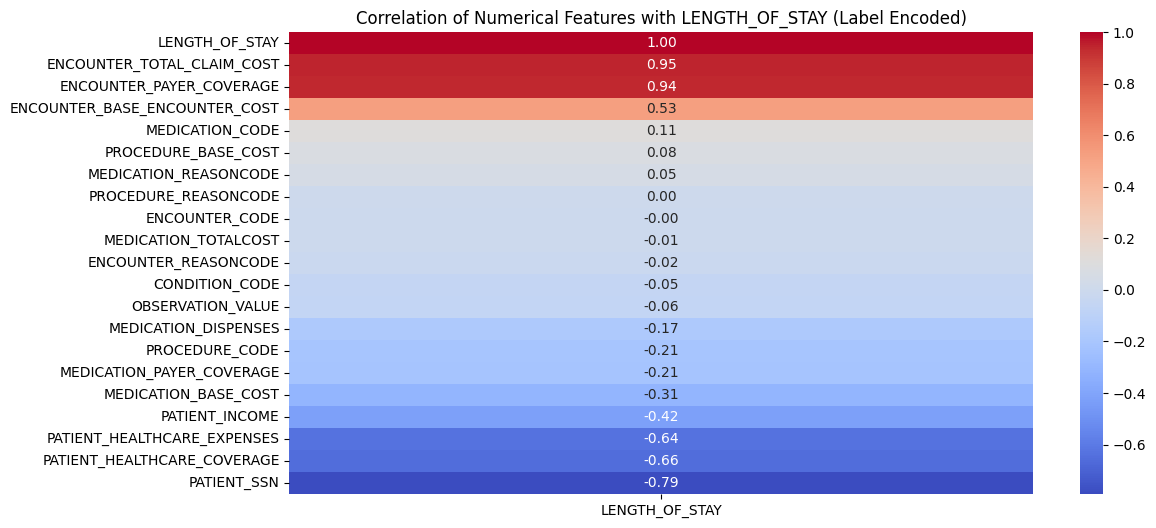


 Point Biserial Correlation (Categorical Features with LENGTH_OF_STAY):



NameError: name 'cat_cols' is not defined

In [ ]:
# Numerical Feature Correlation with LENGTH_OF_STAY
if not pd.api.types.is_categorical_dtype(df['LENGTH_OF_STAY']):
    df['LENGTH_OF_STAY'] = df['LENGTH_OF_STAY'].astype('category')

df['LENGTH_OF_STAY'] = df['LENGTH_OF_STAY'].cat.codes

numerical_features = df.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

encounter_reason_correlations = correlation_matrix['LENGTH_OF_STAY'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['LENGTH_OF_STAY']].sort_values(by='LENGTH_OF_STAY', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features with LENGTH_OF_STAY (Label Encoded)")
plt.show()
# Categorical Features vs. LENGTH_OF_STAY

print("\n Point Biserial Correlation (Categorical Features with LENGTH_OF_STAY):\n")

for col in cat_cols:
    df[col] = df[col].cat.codes

    correlation, p_value = pointbiserialr(df[col], df['LENGTH_OF_STAY'])

    print(f"{col}: Correlation = {correlation:.3f}, p-value = {p_value:.3f}")

    df[col] = df[col].astype('category')

### Key Numerical Features Affecting Length of Stay
1. `ENCOUNTER_REASONDESCRIPTION` (0.97) → Very strong correlation (expected, since reason for admission relates to stay duration).
2. `ENCOUNTER_TOTAL_CLAIM_COST` (0.95) → Higher claim costs = longer stays.
3. `ENCOUNTER_PAYER_COVERAGE` (0.94) → More insurance coverage = longer stays.
4. `ENCOUNTER_BASE_ENCOUNTER_COST` (0.53) → Moderate correlation, likely linked to hospital expenses.
5. `PATIENT_HEALTHCARE_EXPENSES` (-0.64) → Inverse correlation (lower expenses linked to longer stays).
6. `PATIENT_HEALTHCARE_COVERAGE` (-0.66) → Inverse correlation (less coverage linked to longer stays).

Keep the top 4-6 strongest numerical features in your predictive model.

### Key Categorical Features Affecting Length of Stay
- Strong positive correlation:
  - `PROCEDURE_REASONDESCRIPTION` (0.82) → The reason for procedures strongly determines LOS.
  - `ENCOUNTER_PATIENT` (0.66), `PROCEDURE_PATIENT` (0.65), `OBSERVATION_PATIENT` (0.66) → Patient-specific data is very important.
  - `CONDITION_PATIENT` (0.63) → The patient's medical condition impacts LOS.

- Strong negative correlation:
  - `PATIENT_ETHNICITY` (-0.95) → This suggests an issue with how it's coded; it may not be useful for predictions.
  - `MEDICATION_REASONDESCRIPTION` (-0.64) & `MEDICATION_DESCRIPTION` (-0.64) → Indicates medication types might be related to shorter LOS.
  - `PATIENT_MARITAL` (-0.68) → Marital status could affect hospital stay behavior (e.g., support systems at home).

- Keep: `PROCEDURE_REASONDESCRIPTION`, `ENCOUNTER_PATIENT`, `CONDITION_PATIENT`, `OBSERVATION_PATIENT`.
- Drop : `PATIENT_ETHNICITY`, `PATIENT_MARITAL`

<ipython-input-41-3858127c8018>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['ENCOUNTER_REASONDESCRIPTION']):


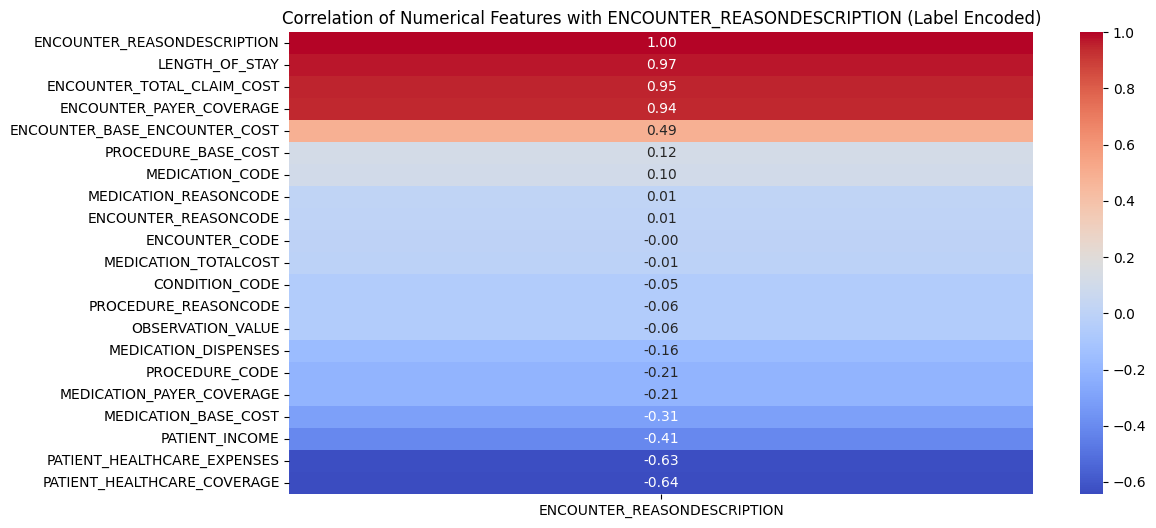


 Chi-Square Test (Categorical Features vs. ENCOUNTER_REASONDESCRIPTION):

CONDITION_DESCRIPTION: Chi-square = 177720814.717, p-value = 0.000
PROCEDURE_DESCRIPTION: Chi-square = 116316339.523, p-value = 0.000
MEDICATION_DESCRIPTION: Chi-square = 78104061.057, p-value = 0.000
ENCOUNTER_DESCRIPTION: Chi-square = 74341081.702, p-value = 0.000
PROCEDURE_REASONDESCRIPTION: Chi-square = 73785904.589, p-value = 0.000
MEDICATION_REASONDESCRIPTION: Chi-square = 64389737.980, p-value = 0.000
OBSERVATION_DESCRIPTION: Chi-square = 33129210.221, p-value = 0.000
MEDICATION_PATIENT: Chi-square = 24046333.175, p-value = 0.000
ENCOUNTER_ENCOUNTERCLASS: Chi-square = 16445381.896, p-value = 0.000
OBSERVATION_PATIENT: Chi-square = 12100046.888, p-value = 0.000
PROCEDURE_PATIENT: Chi-square = 11067373.123, p-value = 0.000
ENCOUNTER_PATIENT: Chi-square = 10280144.925, p-value = 0.000
PATIENT_CITY: Chi-square = 9298203.265, p-value = 0.000
CONDITION_PATIENT: Chi-square = 7360359.003, p-value = 0.000
OBSERVAT

In [ ]:
# Numerical Feature Correlation with ENCOUNTER_REASONDESCRIPTION
if not pd.api.types.is_categorical_dtype(df['ENCOUNTER_REASONDESCRIPTION']):
    df['ENCOUNTER_REASONDESCRIPTION'] = df['ENCOUNTER_REASONDESCRIPTION'].astype('category')

df['ENCOUNTER_REASONDESCRIPTION'] = df['ENCOUNTER_REASONDESCRIPTION'].cat.codes

numerical_features = df.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

encounter_reason_correlations = correlation_matrix['ENCOUNTER_REASONDESCRIPTION'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['ENCOUNTER_REASONDESCRIPTION']].sort_values(by='ENCOUNTER_REASONDESCRIPTION', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features with ENCOUNTER_REASONDESCRIPTION (Label Encoded)")
plt.show()

# Categorical Features vs. ENCOUNTER_REASONDESCRIPTION (Chi-Square Test)
print("\n Chi-Square Test (Categorical Features vs. ENCOUNTER_REASONDESCRIPTION):\n")

chi2_results = {}
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df[target_var])

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = (chi2, p_value)

chi2_results = sorted(chi2_results.items(), key=lambda x: x[1][0], reverse=True)
for col, (chi2_stat, p_value) in chi2_results:
    print(f"{col}: Chi-square = {chi2_stat:.3f}, p-value = {p_value:.3f}")

### Most Important Numerical Features (Correlation Analysis)
- `LENGTH_OF_STAY` (0.97) → Very strong predictor (not surprising—reason for visit impacts LOS).
- `ENCOUNTER_TOTAL_CLAIM_COST` (0.95) → Higher claim costs → Different encounter reasons.
- `ENCOUNTER_PAYER_COVERAGE` (0.94) → Insurance plays a role in reason for admission.
- `ENCOUNTER_BASE_ENCOUNTER_COST` (0.49) → Moderate correlation.

### Most Important Categorical Features (Chi-Square Test)
- `CONDITION_DESCRIPTION` (Chi-square = 177M) → The strongest categorical predictor.
- `PROCEDURE_DESCRIPTION` (Chi-square = 116M) → Highly significant—certain procedures are tied to specific encounters.
- `MEDICATION_DESCRIPTION` (Chi-square = 78M) → Different medications → Different conditions/encounters.
- `ENCOUNTER_DESCRIPTION` (Chi-square = 74M) → Directly related to `ENCOUNTER_REASONDESCRIPTION`.
- `PROCEDURE_REASONDESCRIPTION` (Chi-square = 73M) → Strong link between procedure reasons & encounters.

Keep these

### Features That Are Weak
- `PATIENT_STATE` (Chi-square = 0, p-value = 1.0)  ➝ No variation = Useless feature.
- `PATIENT_GENDER` (Chi-square = 479K) & `PATIENT_RACE` (Chi-square = 459K)  ➝ These are weak predictors compared to others.  

Keep Gender, remove race

# Preparing DFs for modeling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

## Df for LOS

In [ ]:
df.index

RangeIndex(start=0, stop=3887768, step=1)

In [ ]:
selected_columns = ['PATIENT_SSN','ENCOUNTER_REASONDESCRIPTION', 'ENCOUNTER_TOTAL_CLAIM_COST', 'ENCOUNTER_PAYER_COVERAGE',
                    'ENCOUNTER_BASE_ENCOUNTER_COST', 'PROCEDURE_BASE_COST', 'PROCEDURE_REASONDESCRIPTION', 'ENCOUNTER_PATIENT',
                    'PROCEDURE_PATIENT', 'OBSERVATION_PATIENT', 'OBSERVATION_PATIENT', 'CONDITION_PATIENT','LENGTH_OF_STAY']

df_los = df[selected_columns]

print(df_los.shape)
df_los.head()


(3887768, 13)


,PATIENT_SSN,ENCOUNTER_REASONDESCRIPTION,ENCOUNTER_TOTAL_CLAIM_COST,ENCOUNTER_PAYER_COVERAGE,ENCOUNTER_BASE_ENCOUNTER_COST,PROCEDURE_BASE_COST,PROCEDURE_REASONDESCRIPTION,ENCOUNTER_PATIENT,PROCEDURE_PATIENT,OBSERVATION_PATIENT,OBSERVATION_PATIENT,CONDITION_PATIENT,LENGTH_OF_STAY
0,999528591,NaN,1567.0,87.2,136.8,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,NaN,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,0
1,999528591,NaN,1567.0,87.2,136.8,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,NaN,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,0
2,999528591,NaN,1567.0,87.2,136.8,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,NaN,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,0
3,999528591,NaN,1567.0,87.2,136.8,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,NaN,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,0
4,999528591,NaN,1567.0,87.2,136.8,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,NaN,NaN,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,0


In [ ]:
df['PATIENT_SSN'].nunique()

106

In [ ]:
df['LENGTH_OF_STAY'].nunique()

19

## Df for Encounter Reason

In [ ]:
selected_columns = [
    'PATIENT_SSN','LENGTH_OF_STAY','ENCOUNTER_TOTAL_CLAIM_COST','ENCOUNTER_PAYER_COVERAGE',
    'ENCOUNTER_BASE_ENCOUNTER_COST', 'CONDITION_DESCRIPTION', 'PROCEDURE_DESCRIPTION',
    'MEDICATION_DESCRIPTION', 'ENCOUNTER_DESCRIPTION', 'PROCEDURE_REASONDESCRIPTION','PATIENT_GENDER',
    'ENCOUNTER_REASONDESCRIPTION'
]

df_encounter = df[selected_columns]

print(df_encounter.shape)
df_encounter.head()


(3887768, 12)


,PATIENT_SSN,LENGTH_OF_STAY,ENCOUNTER_TOTAL_CLAIM_COST,ENCOUNTER_PAYER_COVERAGE,ENCOUNTER_BASE_ENCOUNTER_COST,CONDITION_DESCRIPTION,PROCEDURE_DESCRIPTION,MEDICATION_DESCRIPTION,ENCOUNTER_DESCRIPTION,PROCEDURE_REASONDESCRIPTION,PATIENT_GENDER,ENCOUNTER_REASONDESCRIPTION
0,999528591,0,1567.0,87.2,136.8,Housing unsatisfactory (finding),NaN,NaN,General examination of patient (procedure),NaN,M,NaN
1,999528591,0,1567.0,87.2,136.8,Received higher education (finding),NaN,NaN,General examination of patient (procedure),NaN,M,NaN
2,999528591,0,1567.0,87.2,136.8,Transport problem (finding),NaN,NaN,General examination of patient (procedure),NaN,M,NaN
3,999528591,0,1567.0,87.2,136.8,Social isolation (finding),NaN,NaN,General examination of patient (procedure),NaN,M,NaN
4,999528591,0,1567.0,87.2,136.8,Stress (finding),NaN,NaN,General examination of patient (procedure),NaN,M,NaN


In [ ]:
df['ENCOUNTER_REASONDESCRIPTION'].unique()

[NaN, 'Fracture of bone (disorder)', 'Closed fracture of hip (disorder)', 'Gingivitis (disorder)', 'Acute viral pharyngitis (disorder)', ..., 'Epidermal burn of skin (disorder)', 'Leukemia  disease (disorder)', 'Awaiting transplantation of bone marrow (situ..., 'Primary fibromyalgia syndrome (disorder)', 'Tongue tie (disorder)']
Length: 106
Categories (105, object): ['Abnormal findings diagnostic imaging heart+co..., 'Acute ST segment elevation myocardial infarct...,
                           'Acute allergic reaction (disorder)', 'Acute bacterial sinusitis (disorder)', ...,
                           'Traumatic dislocation of temporomandibular jo..., 'Tree nut (substance)', 'Tubal pregnancy (disorder)',
                           'Viral sinusitis (disorder)']

## Patient by patient modeling

In [1]:
# Will be grabbing samples of patient data to use for modeling. Still working out details of this with group members for a best approach.

- Logistic regression for a baseline comparison.
- Random Forest for feature importance analysis.
- LSTM and GRU for sequential dependency modeling.
- CNN for spatial-temporal pattern detection.